In [1]:
import numpy as np
import matplotlib.pyplot as plt

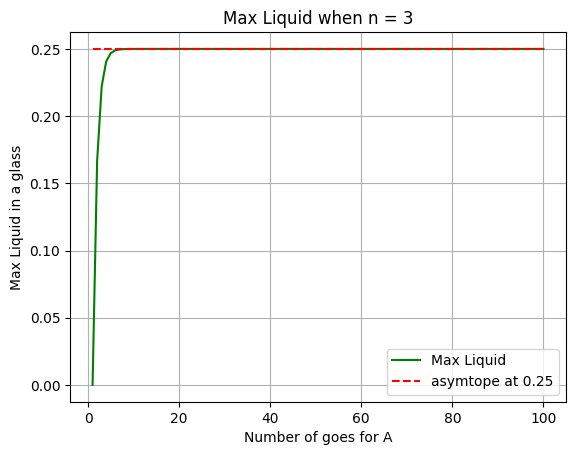

100


In [ ]:
# strategy for n = 3

from fractions import Fraction
m =100
x = np.arange(1, m+1)
def strat_3(m):
    glass_1 = [Fraction(0), Fraction(1, 6)]

    for i in range(2, m):
        glass_1.append(Fraction(4, 3) * glass_1[i - 1] - Fraction(1, 3) * glass_1[i - 2])

    return glass_1

plt.plot(x,strat_3(m), color = "green", label = "Max Liquid")
plt.plot(x, [0.25 for i in range(len(x))], color = "red", linestyle = "--", label = "asymtope at 0.25")
plt.legend()
plt.title("Max Liquid when n = 3")
plt.xlabel("Number of goes for A")
plt.ylabel("Max Liquid in a glass")
plt.grid()
plt.show()

def strat_3_lim(max_m=1000):
    for m in range(1, max_m + 1):  # Iterate up to max_m, think its messing up, ask dino
        last_value = strat_3(m)[-1]
        if last_value >= Fraction(1, 4):
            return m
    return max_m

print(strat_3_lim(m))



In [ ]:
# strategy for larger n


"""
if n%2 == 0:
    k = int(n/2)
else:
    k = int((n-1)/2)
"""

def V(n):
  if n%2 == 0:
    k = int(n/2)
  else:
    k = int((n-1)/2)
  return (1/2)*sum(1/(k-i) for i in range(0,k))


print(V(6))





0.9166666666666666


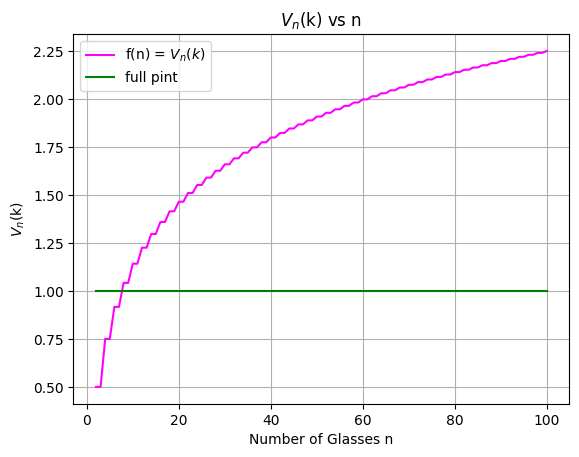

In [ ]:
# graphing strategy 1 for different n
def graph_V(n):

    y_vals = []
    x = np.arange(2, n+1)
    ylim = [1 for i in range(len(x))]

    for i in range(2, n+1):

        y_vals.append(V(i))


    plt.plot(x,y_vals, color = "magenta", label = "f(n) = $V_{n}(k)$")
    plt.plot(x,ylim, color ="green",label = "full pint")
    plt.legend()
    plt.title("$V_{n}$(k) vs n")
    plt.xlabel("Number of Glasses n")
    plt.ylabel("$V_{n}$(k)")
    plt.grid()
    plt.show()
    return


graph_V(100)

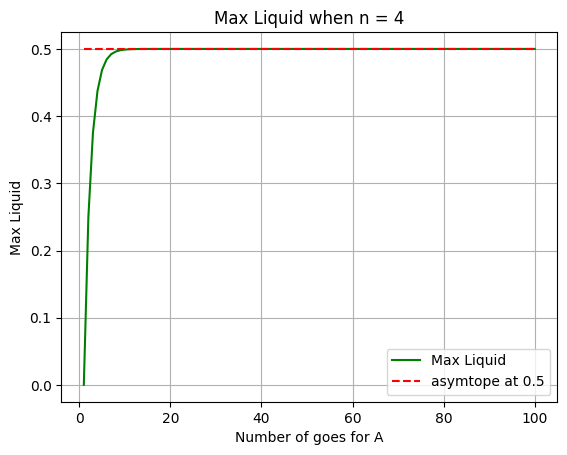

100


In [ ]:
# strategy for n = 4

from fractions import Fraction
m =100
x = np.arange(1, m+1)
def strat_4(m):
    glass_1 = [Fraction(0)]

    for i in range(1, m):
        glass_1.append(Fraction(1,2)*Fraction(2**(i)-1,2**i))

    return glass_1

plt.plot(x,strat_4(m), color = "green", label = "Max Liquid")
plt.plot(x, [0.5 for i in range(len(x))], color = "red", linestyle = "--", label = "asymtope at 0.5")
plt.legend()
plt.title("Max Liquid when n = 4")
plt.xlabel("Number of goes for A")
plt.ylabel("Max Liquid")
plt.grid()
plt.show()

def strat_4_lim(max_m=100):
    for m in range(1, max_m + 1):  # Iterate up to max_m, think its messing up, ask dino
        last_value = strat_4(m)[-1]
        if last_value >= Fraction(1, 2):
            return m
    return max_m

print(strat_4_lim(m))



In [ ]:
# n = 6 iterative formula
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
m =10
x = np.arange(1, m+1)
def strat_6(m):
    glass_1 = [Fraction(1, 6)]

    for i in range(1, m):
        glass_1.append(Fraction(1,6) +Fraction(2, 3) * glass_1[i - 1])

    return glass_1

strat_6(m)


[Fraction(1, 6),
 Fraction(5, 18),
 Fraction(19, 54),
 Fraction(65, 162),
 Fraction(211, 486),
 Fraction(665, 1458),
 Fraction(2059, 4374),
 Fraction(6305, 13122),
 Fraction(19171, 39366),
 Fraction(58025, 118098)]

In [ ]:
from sre_constants import CATEGORY_UNI_NOT_SPACE
from fractions import Fraction
import re

#define pint
PINT = Fraction(1)

#define array for glasses
glasses = []

#define glass class
class Glass:
    def __init__(self):                 # Create glass object with set total capacity (constant), content (amount of water stored), and boolean for if glass is overflowing
        self.capacity = PINT
        self.content = Fraction(0)
        self.is_overflowed = False

    def fill(self, amount):             # Fill glass with amount of water
        self.content += amount
        if self.content > self.capacity:
            self.is_overflowed = True

    def empty(self):                    # Empty glass
        self.content = 0

    def get_content(self):              # Return content of glass
        return self.content

    def get_is_overflowed(self):        # Return if glass is overflowed
        return self.is_overflowed

# define function to print glass contents

def print_glasses():
    print("Glass contents:\n")
    for i in range(len(glasses)):
        print("Glass ",i," is ",glasses[i].get_content()," full\n")
    return

# define player B strategy (glass emptier)

def playerB():
    glass_conts = []

    for i in range(len(glasses)):                          # Get content of each glass
        glass_conts.append(glasses[i].get_content())

    max = 0
    max_indexes = []

    for i in range(len(glass_conts)):                       # Find glass/glasses with highest content and their index
        if glass_conts[i] > max:
            max = glass_conts[i]
            max_indexes = [i]
        elif glass_conts[i] == max:
            max_indexes.append(i)

    max_adjacent = -1
    max_adjacent_pair = []

    for i in max_indexes:
        if i == 0:
            max_adjacent = glass_conts[len(glass_conts) - 1]
            max_adjacent_pair = [i, len(glass_conts) - 1]
        elif glass_conts[i-1] > max_adjacent:
            max_adjacent = glass_conts[i-1]
            max_adjacent_pair = [i-1, i]
        try:
            if glass_conts[i+1] > max_adjacent:
                max_adjacent = glass_conts[i+1]
                max_adjacent_pair = [i, i+1]
        except IndexError:
            if glass_conts[0] > max_adjacent:
                max_adjacent = glass_conts[0]
                max_adjacent_pair = [i, 0]

    glasses[max_adjacent_pair[0]].empty()
    glasses[max_adjacent_pair[1]].empty()

    print("Player B has emptied glasses ",max_adjacent_pair[0]," and ",max_adjacent_pair[1])

    return

# define player A strategy (glass filler)

def playerA(count,duration):

    water_glasses = []

    if count == duration:
        print("Last Ditch")
        for i in glasses:                       # Find glass with water left
            if i.get_content() > 0:
                water_glasses.append(i)

        for i in water_glasses:
            i.fill(Fraction(1,2)/len(water_glasses))

        if (len(water_glasses) > 1):
            return True
        return False

    if len(glasses) == 3:
        return playerA_strat_3()
    elif len(glasses) <= 5:
        return playerA_strat_45()
    elif len(glasses) <= 7:
        return playerA_strat_67(count)
    else:
        return playerA_strat_8(count)


# define player A strategy 3 glasses

def playerA_strat_3():
        max_index = -1
        amount = 0

        for i in glasses:                       # Find glass with water left
            if i.get_content() > 0:
                max_index = i
                amount = i.get_content()

        remainder = Fraction(1,2) - amount*2

        for i in glasses:
            if i != max_index and max_index != -1:
                i.fill(amount)

        for i in glasses:
            i.fill(remainder/3)
        return False
# define player A strategy 4 or 5 glasses

def playerA_strat_45():
    max_index = -1
    amount = 0

    for i in range(len(glasses)):                       # Find glass with water left
        if i == 0 or i == 2:
            if glasses[i].get_content() > 0:
                max_index = i
                amount = glasses[i].get_content()

    remainder = Fraction(1,2) - amount

    for i in range(len(glasses)):
        if i == 0 or i == 2:
            if i != max_index and max_index != -1:
                glasses[i].fill(amount)

    for i in range(len(glasses)):
        if i == 0 or i == 2:
            glasses[i].fill(remainder/2)

    return False

# define player A strategy 6 or 7 glasses

def playerA_strat_67(count):
    max_index = []
    amount = 0
    tofill = Fraction(1,2)

    """            # uncomment for asap win option
    for i in range(len(glasses)):                       # check if a glass contains more than 1/2 and if so fill it to overflow
        if glasses[i].get_content() > Fraction(1,2):
            glasses[i].fill(Fraction(1,2))
            return False
    """

    for i in range(len(glasses)):                       # find the glasses with water left and get their amount
        if glasses[i].get_content() > 0:
            max_index.append(i)
            amount += (glasses[i].get_content() / 2)

    remainder = Fraction(1,2) - amount

    print(remainder)
    print(amount)

    for i in range(len(glasses)):
            if not(i in max_index) and max_index != [] and not (i-1 in max_index) and not (i+1 in max_index):       # fill the empty glass not next to any others up to the level of the other two
                glasses[i].fill(amount)
                tofill -= amount

    for i in range(len(glasses)):                # fill the 3 glasses with water with an equal portion of the remainder
        if glasses[i].get_content() > 0:
            glasses[i].fill(remainder/3)
            tofill -= remainder/3

    if tofill != 0:                             # First turn so no glasses filled yet so pick 3 arbitrary non adjacent glasses and fill equally
        print(tofill)
        glasses[0].fill(Fraction(1,6))
        glasses[2].fill(Fraction(1,6))
        glasses[4].fill(Fraction(1,6))

    return False

#define player A stratergy 8 glasses

def playerA_strat_8(count):
    amount = 0
    if count == 1:
        glasses[0].fill(Fraction(1,4))
        glasses[2].fill(Fraction(1,4))
        glasses[4].fill(Fraction(1,4))
        glasses[6].fill(Fraction(1,4))
    elif count == 2:
        amount = Fraction(1,6)
    elif count == 3:
        amount = Fraction(1,8)
    else:
        amount = Fraction(1,2)

    for i in glasses:
        if i.get_content() > Fraction(0):
            i.fill(amount)
    return False

# define fraction checker

def is_fraction(input):
    fraction_regex = r'^[0-9]+/[1-9][0-9]*'
    return re.match(fraction_regex, input)

# define win check

def game_won_check():
    for i in range(len(glasses)):
        if glasses[i].get_is_overflowed():
            print(i," is overflowed")
            return True
    return False

# Main Program
duration = 20
num_glasses = int(input("Hello, please enter how many glasses you would like to play with: "))

comp_choice = input("Would you like computers to play against each other (y/n): ")

comp_game = False
if comp_choice == "y":
    comp_game = True

for i in range(num_glasses):
    glasses.append(Glass())

game_won = False
print_glasses()
if not comp_game:
    while True:
        total_content_to_add = Fraction(1,2)
        while total_content_to_add > 0:
            print("Total amount of water still to add: ",total_content_to_add)
            choice = int(input("Which glass would you like to add some water too: "))
            valid_fraction = False
            while not valid_fraction:
                amount_to_add = input("How much water would you like to add: ")
                if is_fraction(amount_to_add):
                    amount_to_add = amount_to_add.split('/')
                    amount_to_add = Fraction(int(amount_to_add[0]),int(amount_to_add[1]))
                    if total_content_to_add >= amount_to_add:
                        valid_fraction = True
            glasses[choice].fill(amount_to_add)
            if glasses[choice].get_is_overflowed():
                print("Glass ",choice," is now overflowing, Player A has won!")
                game_won = True
                max = 0
                for i in range(len(glasses)):
                    if glasses[i].get_content() > glasses[max].get_content():
                        max = i
                print("Player A managed to get a glass to ",float(glasses[max].get_content()))
                break
            total_content_to_add -= amount_to_add
            print_glasses()
        if game_won:
            break
        playerB()
        print_glasses()
else:
    count = 0
    while True:
        count += 1
        print("Player A's turn:")
        if playerA(count,duration):
            duration += 1
        print_glasses()
        if game_won_check():
            print("Player A has won!")
            max = 0
            for i in range(len(glasses)):
                if glasses[i].get_content() > glasses[max].get_content():
                    max = i
            print("Player A managed to get a glass to ",float(glasses[max].get_content()))
            break
        if count == duration:
            print("Game duration exceeded, player A surrenders and player B wins")
            for i in glasses:
                if i.get_content() > 0:
                    print("Player A managed to get a glass to ",float(i.get_content()))
            break
        print("Player B's turn:")
        playerB()
        print_glasses()
print("Game Over!")






Glass contents:

Glass  0  is  0  full

Glass  1  is  0  full

Glass  2  is  0  full

Glass  3  is  0  full

Glass  4  is  0  full

Glass  5  is  0  full

Player A's turn:
1/2
0
1/2
Glass contents:

Glass  0  is  1/6  full

Glass  1  is  0  full

Glass  2  is  1/6  full

Glass  3  is  0  full

Glass  4  is  1/6  full

Glass  5  is  0  full

Player B's turn:
Player B has emptied glasses  0  and  5
Glass contents:

Glass  0  is  0  full

Glass  1  is  0  full

Glass  2  is  1/6  full

Glass  3  is  0  full

Glass  4  is  1/6  full

Glass  5  is  0  full

Player A's turn:
1/3
1/6
Glass contents:

Glass  0  is  5/18  full

Glass  1  is  0  full

Glass  2  is  5/18  full

Glass  3  is  0  full

Glass  4  is  5/18  full

Glass  5  is  0  full

Player B's turn:
Player B has emptied glasses  0  and  5
Glass contents:

Glass  0  is  0  full

Glass  1  is  0  full

Glass  2  is  5/18  full

Glass  3  is  0  full

Glass  4  is  5/18  full

Glass  5  is  0  full

Player A's turn:
2/9
5/18
Glass co

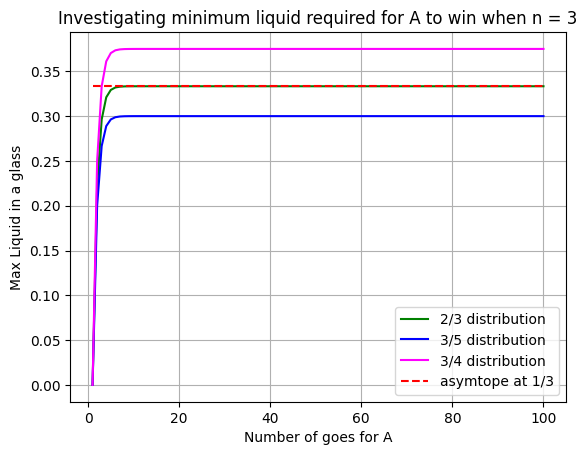

In [ ]:
# ext strategy for n = 3, finding min liquid A needs to win
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
m =100
n =Fraction(2,3)
k = Fraction(3,5)
z = Fraction(3,4)
x = np.arange(1, m+1)
def strat_3(n):
    glass_1 = [Fraction(0), Fraction(n, 3)]

    for i in range(2, m):
        glass_1.append(Fraction(4, 3) * glass_1[i - 1] - Fraction(1, 3) * glass_1[i - 2])

    return glass_1

plt.plot(x,strat_3(n), color = "green",label = "2/3 distribution")
plt.plot(x,strat_3(k), color = "blue", label = "3/5 distribution")
plt.plot(x,strat_3(z), color = "magenta", label = "3/4 distribution")
plt.plot(x, [1/3 for i in range(len(x))], color = "red", linestyle = "--", label = "asymtope at 1/3")
plt.legend()
plt.title("Investigating minimum liquid required for A to win when n = 3")
plt.xlabel("Number of goes for A")
plt.ylabel("Max Liquid in a glass")
plt.grid()
plt.show()

def strat_3_lim(max_m=1000):
    for m in range(1, max_m + 1):  # Iterate up to max_m, think its messing up, ask dino
        last_value = strat_3(m)[-1]
        if last_value >= Fraction(1, 4):
            return m
    return max_m



In [ ]:
#ext, looking at n=3 case with liquid being 2/3
def recurrence_relation(n, a0, a1):
    # Initialize the list to store the terms of the sequence
    a = [a0, a1]

    # Compute terms from a2 to a_n based on the recurrence relation
    for i in range(2, n+1):
        a_next = a[i-1] + (1/3) * (a[i-1] - a[i-2])
        a.append(a_next)

    return a

# Example usage:
n = 10  # Number of terms to calculate
a0 = 0  # Initial value a_0
a1 = 2/9  # Initial value a_1

sequence = recurrence_relation(n, a0, a1)
print(sequence)


[0, 0.2222222222222222, 0.2962962962962963, 0.32098765432098764, 0.3292181069958848, 0.3319615912208505, 0.33287608596250573, 0.33318091754305745, 0.33328252806990805, 0.3333163982455249, 0.33332768830406384]


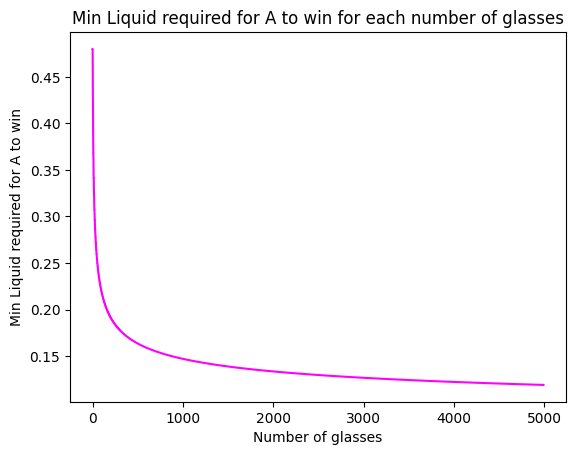

In [ ]:
# looking at min liquid needed for n>= 8
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

def Harm(k):
  return sum([Fraction(1,i) for i in range(1,k+1)])


def min_liquid(n):
  if n%2 == 0:
    k = int(n/2)
  else:
    k = int((n-1)/2)
  return 1/Harm(k)
x_vals = []
for i in range(8,5000):
  x_vals.append(min_liquid(i))
plt.plot(x_vals, color = "magenta")
plt.xlabel("Number of glasses")
plt.ylabel("Min Liquid required for A to win")
plt.title("Min Liquid required for A to win for each number of glasses")
plt.show()


In [ ]:
#trying to show that in the n=4 case taking any liquid more than 1\2 gives A the win
def recurrence_relation(n, a0, a1):
    # Initialize the list to store the terms of the sequence
    a = [a0, a1]
    k = 0.51
    # Compute terms from a2 to a_n based on the recurrence relation
    for i in range(2, n+1):
        a_next = 0.5*a[i-1] + 0.5*(k)
        a.append(a_next)

    return a
k =0.51
print(recurrence_relation(10, 0, 0.5*k))


[0, 0.255, 0.3825, 0.44625000000000004, 0.478125, 0.4940625, 0.50203125, 0.5060156250000001, 0.5080078125, 0.50900390625, 0.509501953125]


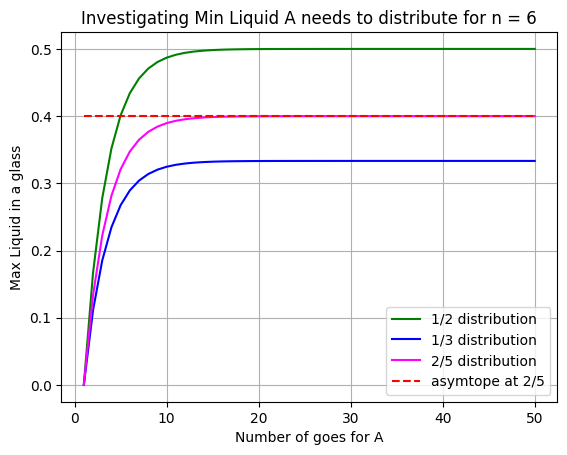

In [ ]:
# n=6 min liquid
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
m =50
n =Fraction(1,2)
k = Fraction(1,3)
z = Fraction(2,5)
x = np.arange(1, m+1)
def strat_6(n):
    glass_1 = [Fraction(0), Fraction(n, 3)]

    for i in range(2, m):
        glass_1.append(glass_1[i - 1] +(1/3)*(n-glass_1[i - 1]))

    return glass_1

plt.plot(x,strat_6(n), color = "green", label = "1/2 distribution")
plt.plot(x,strat_6(k), color = "blue", label = "1/3 distribution")
plt.plot(x,strat_6(z), color = "magenta", label = "2/5 distribution")
plt.plot(x, [2/5 for i in range(len(x))], color = "red", linestyle = "--", label = "asymtope at 2/5")
plt.legend()
plt.title("Investigating Min Liquid A needs to distribute for n = 6")
plt.xlabel("Number of goes for A")
plt.ylabel("Max Liquid in a glass")
plt.grid()
plt.show()

In [ ]:
print(strat_6(z))

[Fraction(0, 1), Fraction(2, 15), 0.2222222222222222, 0.2814814814814815, 0.3209876543209877, 0.3473251028806585, 0.364883401920439, 0.376588934613626, 0.3843926230757507, 0.3895950820505005, 0.39306338803366697, 0.39537559202244466, 0.39691706134829646, 0.39794470756553096, 0.39862980504368734, 0.3990865366957916, 0.39939102446386104, 0.3995940163092407, 0.39972934420616046, 0.39981956280410696, 0.3998797085360713, 0.3999198056907142, 0.39994653712714284, 0.3999643580847619, 0.3999762387231746, 0.3999841591487831, 0.3999894394325221, 0.3999929596216814, 0.3999953064144543, 0.39999687094296954, 0.3999979139619797, 0.3999986093079865, 0.399999072871991, 0.39999938191466067, 0.39999958794310714, 0.3999997252954048, 0.3999998168636032, 0.3999998779090688, 0.3999999186060459, 0.3999999457373639, 0.39999996382490927, 0.39999997588327285, 0.3999999839221819, 0.3999999892814546, 0.39999999285430304, 0.39999999523620205, 0.39999999682413473, 0.3999999978827565, 0.3999999985885043, 0.3999999990